In [11]:
import pandas as pd
import numpy as np
# from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from automl.data import Dataset
from pathlib import Path

In [12]:
FILE = Path(".").absolute().resolve()
DATADIR = FILE / "data"
# ["bike_sharing_demand", "brazilian_houses", "superconductivity", "wine_quality", "yprop_4_1"]
dataset = Dataset.load(DATADIR, "bike_sharing_demand", 1)
X_train, y_train, X_test, y_test = dataset.load_test_train()
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [13]:
X

,season,year,month,hour,holiday,workingday,weather,temp,feel_temp,humidity,windspeed
0,1,1,12,21,0,1,2,9.84,11.365,0.60,16.9979
1,0,0,7,20,0,1,0,31.16,35.605,0.58,23.9994
2,3,1,12,2,0,1,0,11.48,15.150,0.65,6.0032
3,2,0,4,23,0,1,0,18.86,22.725,0.41,19.9995
4,3,0,12,5,0,1,0,7.38,12.120,0.86,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
777,2,1,5,17,0,1,2,27.06,31.060,0.69,16.9979
778,1,1,2,20,0,1,3,17.22,21.210,0.88,11.0014
779,2,0,5,10,0,0,2,21.32,25.000,0.94,11.0014
780,3,0,10,7,0,0,0,17.22,21.210,0.94,6.0032


In [14]:
y

0       63
1      285
2        3
3       40
4       20
      ... 
777    508
778     97
779    167
780     73
781     83
Name: count, Length: 7820, dtype: int64

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7820 entries, 0 to 781
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      7820 non-null   category
 1   year        7820 non-null   category
 2   month       7820 non-null   uint8   
 3   hour        7820 non-null   uint8   
 4   holiday     7820 non-null   category
 5   workingday  7820 non-null   category
 6   weather     7820 non-null   category
 7   temp        7820 non-null   float64 
 8   feel_temp   7820 non-null   float64 
 9   humidity    7820 non-null   float64 
 10  windspeed   7820 non-null   float64 
dtypes: category(5), float64(4), uint8(2)
memory usage: 359.7 KB


In [16]:
X.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
workingday    0
weather       0
temp          0
feel_temp     0
humidity      0
windspeed     0
dtype: int64

In [17]:
X.describe()

,month,hour,temp,feel_temp,humidity,windspeed
count,7820.000000,7820.000000,7820.000000,7820.000000,7820.000000,7820.000000
mean,6.515601,11.511509,20.399754,23.836331,0.628258,12.734585
std,3.425884,6.923457,7.847481,8.534031,0.192202,8.189758
min,1.000000,0.000000,0.820000,0.000000,0.000000,0.000000
25%,4.000000,5.000000,13.940000,16.665000,0.480000,7.001500
50%,6.500000,12.000000,20.500000,24.240000,0.630000,11.001400
75%,9.000000,18.000000,27.060000,31.060000,0.790000,16.997900
max,12.000000,23.000000,41.000000,50.000000,1.000000,55.998600


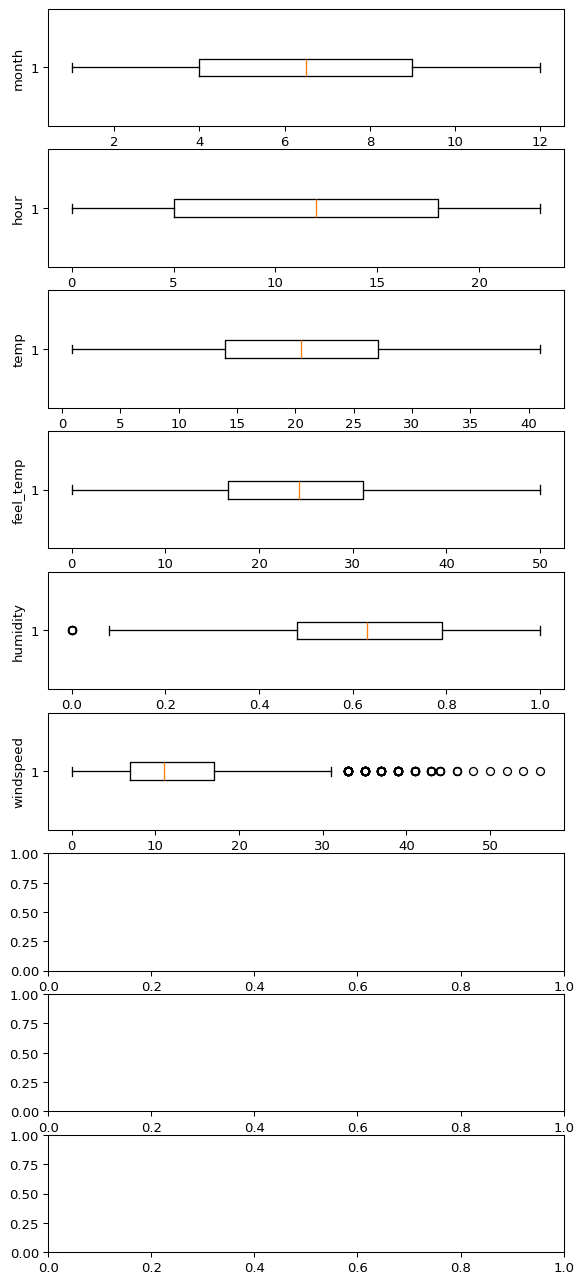

In [18]:
# Box Plots
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in X.select_dtypes(include=[np.number]).columns: #columns of dtype float64 X.select_dtypes(include=[np.float64]).columns:
    axs[i].boxplot(X[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

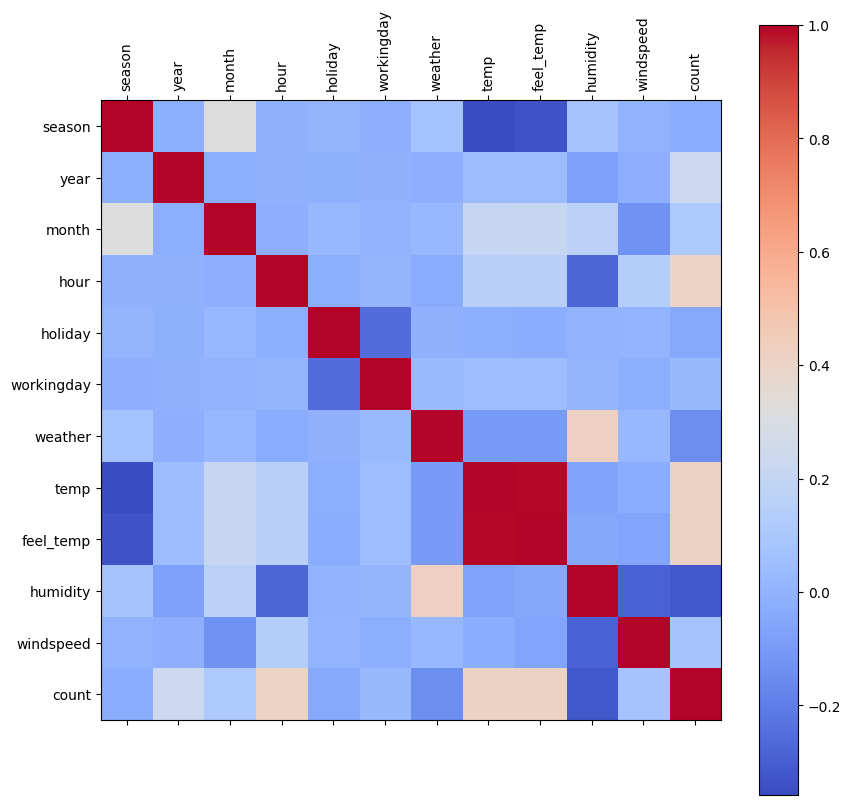

In [19]:
corr = pd.concat([X, y], axis=1).corr()

fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(corr, cmap='coolwarm')
plt.colorbar(cax)
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)
plt.show()

In [20]:
corr['total_(BRL)'].sort_values(ascending = False)

KeyError: 'total_(BRL)'